# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [23]:
df = pd.read_csv("C:\\Users\\DELL\\Documents\\ebac\\MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv",
                 delimiter=';',
                 encoding='ISO-8859-1')

# Exibir as primeiras linhas do DataFrame
print(df.head(10))

   Unnamed: 0                                             title       Marca  \
0           0              Pack 12 un, Leche extra proteína 1 L  Loncoleche   
1           1   Pack 12 un, Leche chocolate receta original 1 L     Soprole   
2           2    Pack 12 un, Leche semidescremada chocolate 1 L     Soprole   
3           3     Pack 12 un, Leche semidescremada frutilla 1 L     Soprole   
4           4       Pack 12 un, Leche sin lactosa chocolate 1 L  Loncoleche   
5           5        Pack 12 un, Leche sin lactosa frutilla 1 L  Loncoleche   
6           6  Pack 12 un, Leche saborizada light chocolate 1 L  Loncoleche   
7           7         Pack 12 un, Leche saborizada frutilla 1 L       Colun   
8           8         Pack 12 un, Leche saborizada vainilla 1 L       Colun   
9           9           Pack 12 un, Leche saborizada manjar 1 L       Colun   

   Preco_Normal  Preco_Desconto  Preco_Anterior  Desconto Categoria  
0         19788           19688           19588       100   

Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [24]:
media_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean()
mediana_por_categoria = df.groupby('Categoria')['Preco_Normal'].median()

print("Média dos preços por categoria:\n", media_por_categoria)
print("Mediana dos preços por categoria:\n", mediana_por_categoria)


Média dos preços por categoria:
 Categoria
lacteos    18060.0
Name: Preco_Normal, dtype: float64
Mediana dos preços por categoria:
 Categoria
lacteos    17988.0
Name: Preco_Normal, dtype: float64


In [25]:
diferenca_media_mediana = media_por_categoria - mediana_por_categoria
categorias_com_diferenca = diferenca_media_mediana[diferenca_media_mediana.abs() > 0]
print("Categorias com diferença significativa entre média e mediana:\n", categorias_com_diferenca)



Categorias com diferença significativa entre média e mediana:
 Categoria
lacteos    72.0
Name: Preco_Normal, dtype: float64


Digite aqui as categorias:

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [27]:
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std()
print("Desvio padrão dos preços por categoria:\n", desvio_padrao_por_categoria)

print("Comportamento da média e mediana nas categorias com maior desvio:\n")
categoria_maior_desvio = desvio_padrao_por_categoria.idxmax()
print(f"Categoria com maior desvio padrão: {categoria_maior_desvio}")


Desvio padrão dos preços por categoria:
 Categoria
lacteos    702.452845
Name: Preco_Normal, dtype: float64
Comportamento da média e mediana nas categorias com maior desvio:

Categoria com maior desvio padrão: lacteos


# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

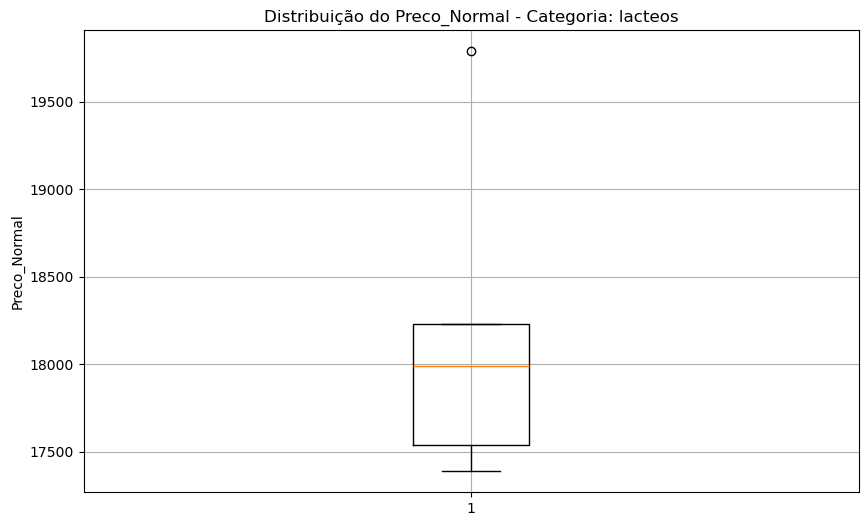

In [28]:
dados_categoria_maior_desvio = df.loc[df['Categoria'] == categoria_maior_desvio]

plt.figure(figsize=(10, 6))
plt.boxplot(dados_categoria_maior_desvio['Preco_Normal'])
plt.title(f'Distribuição do Preco_Normal - Categoria: {categoria_maior_desvio}')
plt.ylabel('Preco_Normal')
plt.grid()
plt.show()


# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

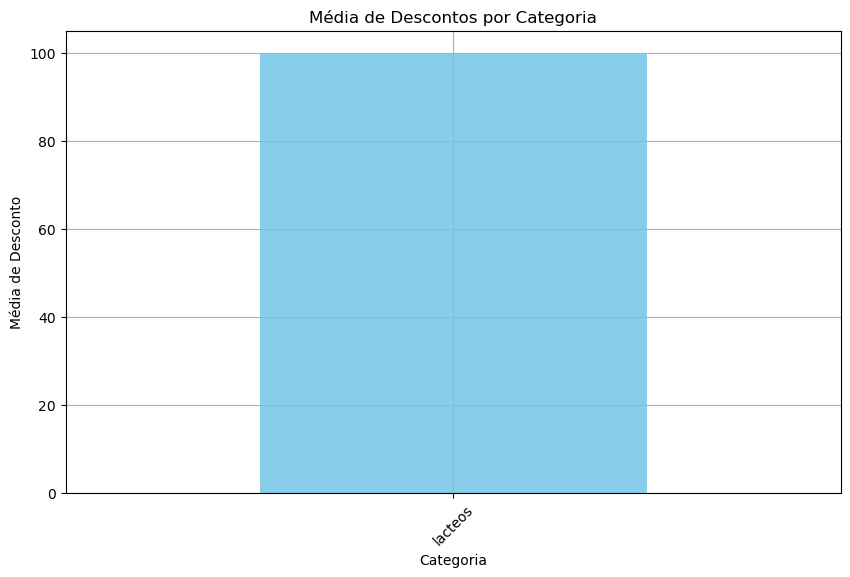

In [29]:
media_desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean()

plt.figure(figsize=(10, 6))
media_desconto_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Média de Descontos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Média de Desconto')
plt.xticks(rotation=45)
plt.grid()
plt.show()


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

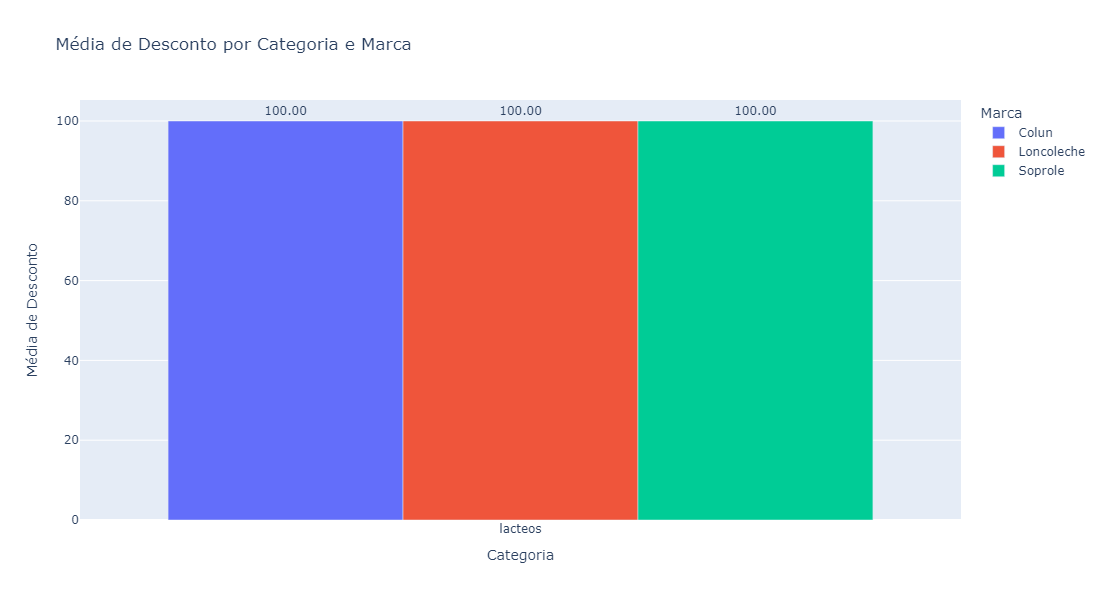

In [30]:
# 6 - Gráfico de barras interativo da média de descontos por categoria e marca
media_desconto_por_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Criar um gráfico de barras interativo
fig = px.bar(
    media_desconto_por_categoria_marca,
    x='Categoria',
    y='Desconto',
    color='Marca',
    title='Média de Desconto por Categoria e Marca',
    labels={'Desconto': 'Média de Desconto'},
    height=600
)

# Ajustes adicionais para melhor apresentação
fig.update_layout(barmode='group', xaxis_title='Categoria', yaxis_title='Média de Desconto')
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')  # Exibir os valores acima das barras

# Exibir o gráfico
fig.show()